In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style=('whitegrid')

In [3]:
df = pd.read_csv('..\data\players_22.csv', low_memory=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_42540\1006819348.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\players_22.csv', low_memory=False)


In [4]:
df_copy = df.copy()

In [7]:
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']]
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [12]:
df['player_positions'].str.split(',', expand=True)[0]

0         RW
1         ST
2         ST
3         LW
4         CM
        ... 
19234    CDM
19235     CM
19236     CM
19237     ST
19238    CAM
Name: 0, Length: 19239, dtype: object

In [15]:
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]
df.dropna(inplace=True)
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [ ]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba', 'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué', 'P. Kimpembe', 'M. Maignan', 'Coutinho', 'G. Wijnaldum', 'R. James', 'B. Chilwell', 'Roberto', 'T. Tissoudali', 'Y. Nakayama', 'M. Crépeau', 'J. Corona', 'C. Richards', 'T. Werner', 'N. González', 'J. Correa']
eliminar_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(eliminar_index, axis=0, inplace=True)

In [56]:
teams_worldcup = ['Qatar','France', 'Brazil', 'Germany', 'Portugal', 'Argentina', 'Belgium', 'Spain', 'Italy', 'Netherlands', 'England', 'Mexico', 'Netherlands', 'Denmark', 'Uruguay', 'Switzerland', 'United States', 'Croatia', 'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia', 'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia',]

df = df[df['nationality_name'].isin(teams_worldcup)]


In [57]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_42540\2532729969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


## 1. Distribución de jugarores

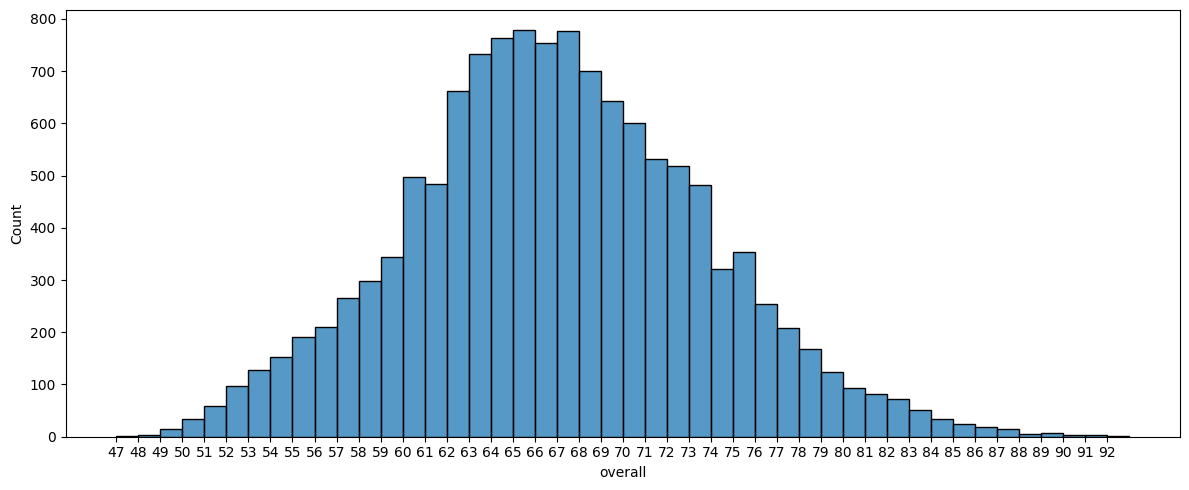

In [83]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

## 2. Mejor equipo del Mundial 2022

In [77]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


## 3. El mejor jugador de cada país en el mundial

C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_42540\87567182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)
C:\Users\moreiracristian\AppData\Local\Temp\ipykernel_42540\87567182.py:6: UserWarning: 
The palette list has fewer values (10) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)


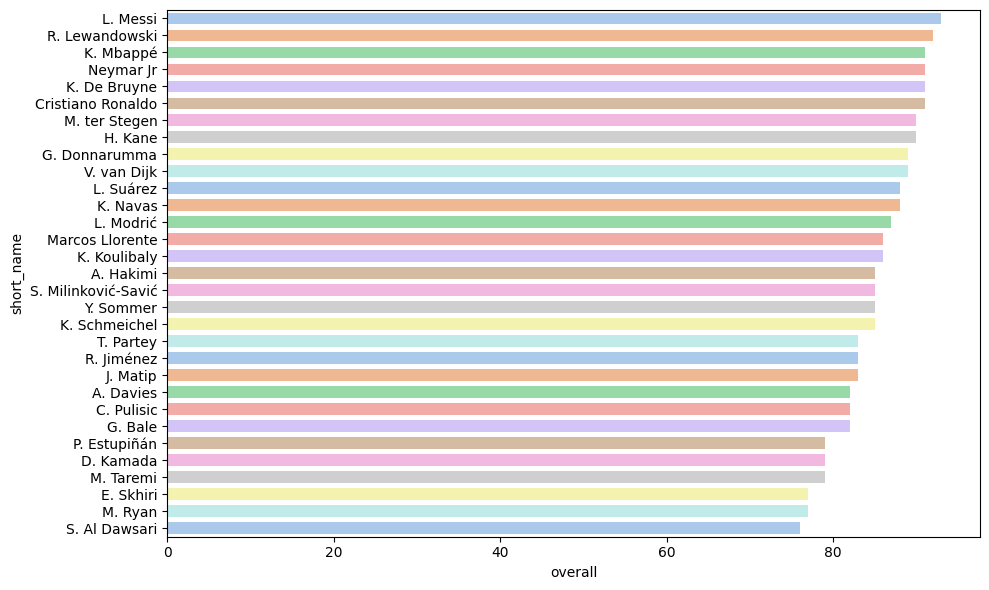

In [99]:
df_best_player = df.copy()
df_best_player = df_best_player.drop_duplicates('nationality_name').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(df_best_player, x='overall', y='short_name', palette=sns.color_palette('pastel'), width=0.7)
plt.show()

## 4. La mejor plantilla para cada país